# SoilSpecData


> A Python package for handling soil spectroscopy data, with a focus on the [Open Soil Spectral Library (OSSL)](https://explorer.soilspectroscopy.org/).

## Installation

```sh
pip install -U soilspecdata
```

The `-U` flag is used to update the package to the latest version. This is important to ensure that you have the latest features and bug fixes.

If you want to install the development version, run in the project root:

```sh
pip install -e .[dev]
```

## Features

- Easy loading and handling of OSSL dataset
- Support for both VISNIR (Visible Near-Infrared) and MIR (Mid-Infrared) spectral data
- Flexible wavenumber range filtering
- Convenient access to soil properties and metadata
- Automatic caching of downloaded data
- Get aligned spectra and target variable(s)
- *Further datasets to come ...*


## Quick Start


In [ ]:
# Import the package
from soilspecdata.datasets.ossl import get_ossl

### Load OSSL dataset

In [ ]:
#| eval: false
ossl = get_ossl()

The spectral analysis covers both MIR `(400-4000 cm⁻¹)` and VISNIR `(4000-28571 cm⁻¹)` regions, with data reported in increasing wavenumbers for consistency across the entire spectral range. 

Ranges of interest can further be filtered using the `wmin` and `wmax` parameters in the `get_mir` and `get_visnir` methods.

### MIR spectra


In [ ]:
#| eval: false
mir_data = ossl.get_mir()

### VISNIR spectra

Using custom wavenumber range:

In [ ]:
#| eval: false
visnir_data = ossl.get_visnir(wmin=4000, wmax=25000)

### VISNIR | MIR dataclass member variables

In [ ]:
#| eval: false
print(visnir_data)

SpectraData attributes:
----------------------
Available attributes: wavenumbers, spectra, measurement_type, sample_ids

Wavenumbers:
-----------
[4000, 4003, 4006, 4009, 4012, 4016, 4019, 4022, 4025, 4029]
Shape: (1051,)

Spectra:
-------
[[0.3859, 0.3819, 0.3792, 0.3776, 0.3769],
 [0.3429, 0.3419, 0.3414, 0.3413, 0.3415],
 [0.3425, 0.3384, 0.3354, 0.3334, 0.3323],
 [0.2745, 0.2754, 0.2759, 0.2761, 0.276 ],
 [0.285 , 0.2794, 0.2755, 0.273 , 0.2718]]
Shape: (64644, 1051)

Measurement type (Reflectance or Absorbance):
--------------------------------------------
ref

Sample IDs:
----------
['FS15R_FS4068', 'FS15R_FS4069', 'FS15R_FS4070', 'FS15R_FS4071',
 'FS15R_FS4072', 'FS15R_FS4073', 'FS15R_FS4074', 'FS15R_FS4075',
 'FS15R_FS4076', 'FS15R_FS4077']
Total samples: 64644


### Getting soil properties and other metadata

Example: get **Cation Exchange Capacity (CEC)** measurements (in cmolc/kg) for all samples. Results are returned as a `pd.DataFrame` indexed by sample ID (`id`):

In [ ]:
#| eval: false
properties = ossl.get_properties(['cec_usda.a723_cmolc.kg'], require_complete=True)
properties.head()

,cec_usda.a723_cmolc.kg
id,
S40857,6.633217
S40858,3.822628
S40859,3.427324
S40860,1.906545
S40861,13.403203


::: {.callout-note}
`require_complete=True` ensures that only non null values are returned in selected columns (here `cec_usda.a723_cmolc.kg`).
:::

For more details on the OSSL dataset and its variables, see the [OSSL documentation](https://soilspectroscopy.github.io/ossl-manual/db-desc.html). Any column name part of the `ossl.properties_cols` list can be used as a target or metadata variable.



In [ ]:
#| eval: false
ossl.properties_cols

['dataset.code_ascii_txt',
 'id.layer_local_c',
 'id.layer_uuid_txt',
 'id.project_ascii_txt',
 'id.location_olc_txt',
 'id.dataset.site_ascii_txt',
 'id.scan_local_c',
 'longitude.point_wgs84_dd',
 'latitude.point_wgs84_dd',
 'layer.sequence_usda_uint16',
 'layer.upper.depth_usda_cm',
 'layer.lower.depth_usda_cm',
 'observation.date.begin_iso.8601_yyyy.mm.dd',
 'observation.date.end_iso.8601_yyyy.mm.dd',
 'surveyor.title_utf8_txt',
 'layer.texture_usda_txt',
 'pedon.taxa_usda_txt',
 'horizon.designation_usda_txt',
 'longitude.county_wgs84_dd',
 'latitude.county_wgs84_dd',
 'location.point.error_any_m',
 'location.country_iso.3166_txt',
 'observation.ogc.schema.title_ogc_txt',
 'observation.ogc.schema_idn_url',
 'surveyor.contact_ietf_email',
 'surveyor.address_utf8_txt',
 'dataset.title_utf8_txt',
 'dataset.owner_utf8_txt',
 'dataset.address_idn_url',
 'dataset.doi_idf_url',
 'dataset.license.title_ascii_txt',
 'dataset.license.address_idn_url',
 'dataset.contact.name_utf8_txt',
 'dat

* Get metadata (e.g., geographical coordinates):


In [ ]:
#| eval: false
metadata = ossl.get_properties(['longitude.point_wgs84_dd', 'latitude.point_wgs84_dd'], require_complete=False)

### Preparing data for machine learning pipeline

To get directly aligned spectra and target variable(s):

In [ ]:
#| eval: false
X, y, ids = ossl.get_aligned_data(
    spectra_data=mir_data,
    target_cols='cec_usda.a723_cmolc.kg'
)

X.shape, y.shape, ids.shape

((57064, 1701), (57064, 1), (57064,))

And plot the first 20 MIR spectra:

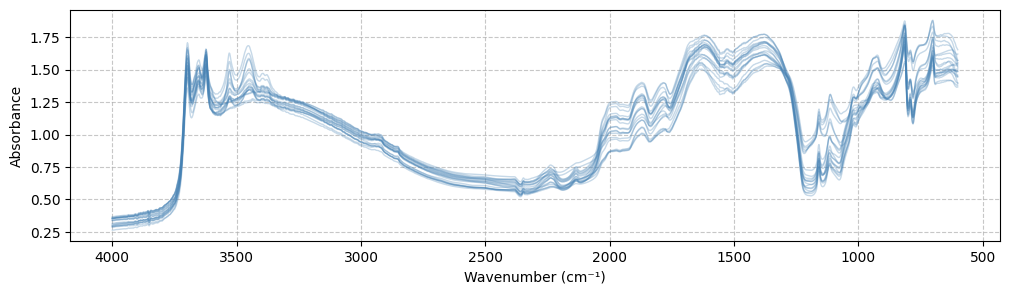

In [ ]:
#| eval: false
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(mir_data.wavenumbers, mir_data.spectra[:20,:].T, alpha=0.3, color='steelblue', lw=1)
plt.gca().invert_xaxis()
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance');

## Data Structure

The package returns spectra data in a structured format containing:

- Wavenumbers
- Spectra measurements
- Measurement type (reflectance/absorbance)
- Sample IDs

Properties and metadata are returned as pandas DataFrames indexed by sample ID.


## Cache Management

By default, the OSSL dataset is cached in `~/.soilspecdata/`. To force a fresh download:

```python
ossl = get_ossl(force_download=True)
```


## Contributing

Contributions are welcome! Please feel free to submit a Pull Request.

## License

Apache2

## Citation(s)

- [OSSL Library](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0296545): Safanelli, J.L., Hengl, T., Parente, L.L., Minarik, R., Bloom, D.E., Todd-Brown, K., Gholizadeh, A., Mendes, W. de S., Sanderman, J., 2025. Open Soil Spectral Library (OSSL): Building reproducible soil calibration models through open development and community engagement. PLOS ONE 20, e0296545. https://doi.org/10.1371/journal.pone.0296545
